<a href="https://colab.research.google.com/github/RisalahNaufal/DATA-MINING_Algoritma-DBSCAN-Dataset-Customer-Cluster/blob/main/008_DBSCAN_CUSTOMER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRE-PROCESS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans, KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [ ]:
df = pd.read_csv('Customers Cluster.csv')
df.head()

,ID,Gender,Age,Income,Spending
0,1,Female,47,600240,0.16
1,2,Male,60,150060,0.04
2,3,Male,63,240096,0.51
3,4,Male,48,270108,0.46
4,5,Female,35,105042,0.35


In [ ]:
df = df.drop(['ID'], axis=1)
df.head(10)

,Gender,Age,Income,Spending
0,Female,47,600240,0.16
1,Male,60,150060,0.04
2,Male,63,240096,0.51
3,Male,48,270108,0.46
4,Female,35,105042,0.35
5,Male,68,315126,0.43
6,Female,46,125050,0.05
7,Female,38,565226,0.91
8,Male,19,370148,0.10
9,Female,35,370148,0.72


In [ ]:
df['Gender'] = df['Gender'].replace({"Female":0,"Male":1})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    200 non-null    int64  
 1   Age       200 non-null    int64  
 2   Income    200 non-null    int64  
 3   Spending  200 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.4 KB


In [ ]:
df.head(15)

,Gender,Age,Income,Spending
0,0,47,600240,0.16
1,1,60,150060,0.04
2,1,63,240096,0.51
3,1,48,270108,0.46
4,0,35,105042,0.35
5,1,68,315126,0.43
6,0,46,125050,0.05
7,0,38,565226,0.91
8,1,19,370148,0.10
9,0,35,370148,0.72


In [ ]:
df.isnull().sum()

Gender      0
Age         0
Income      0
Spending    0
dtype: int64

#K-MEAN

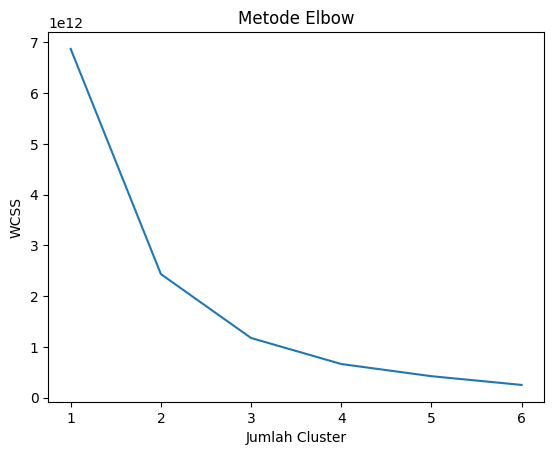

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

<bound method Visualizer.poof of KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=0),
                 k=(1, 10))>

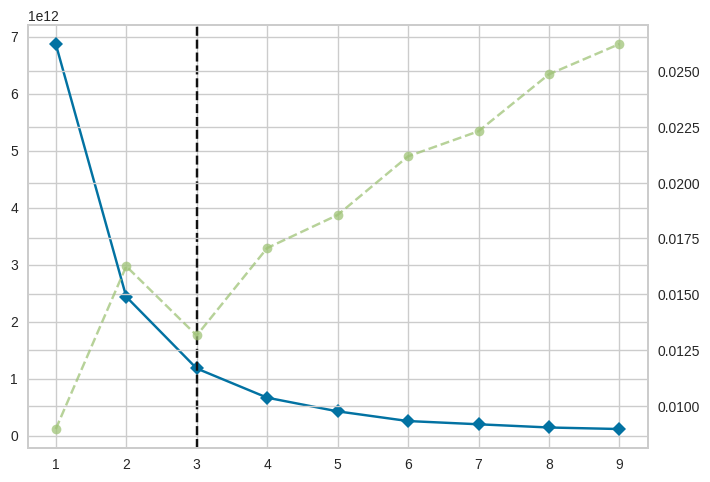

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
vis_elbow = KElbowVisualizer(kmeans, k = (1,10))
vis_elbow.fit(df)
vis_elbow.poof

In [ ]:
X_numerics = df[['Gender','Age','Income','Spending']]

In [ ]:
KM_5_clusters = KMeans(n_clusters=3, init='k-means++', n_init=10).fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

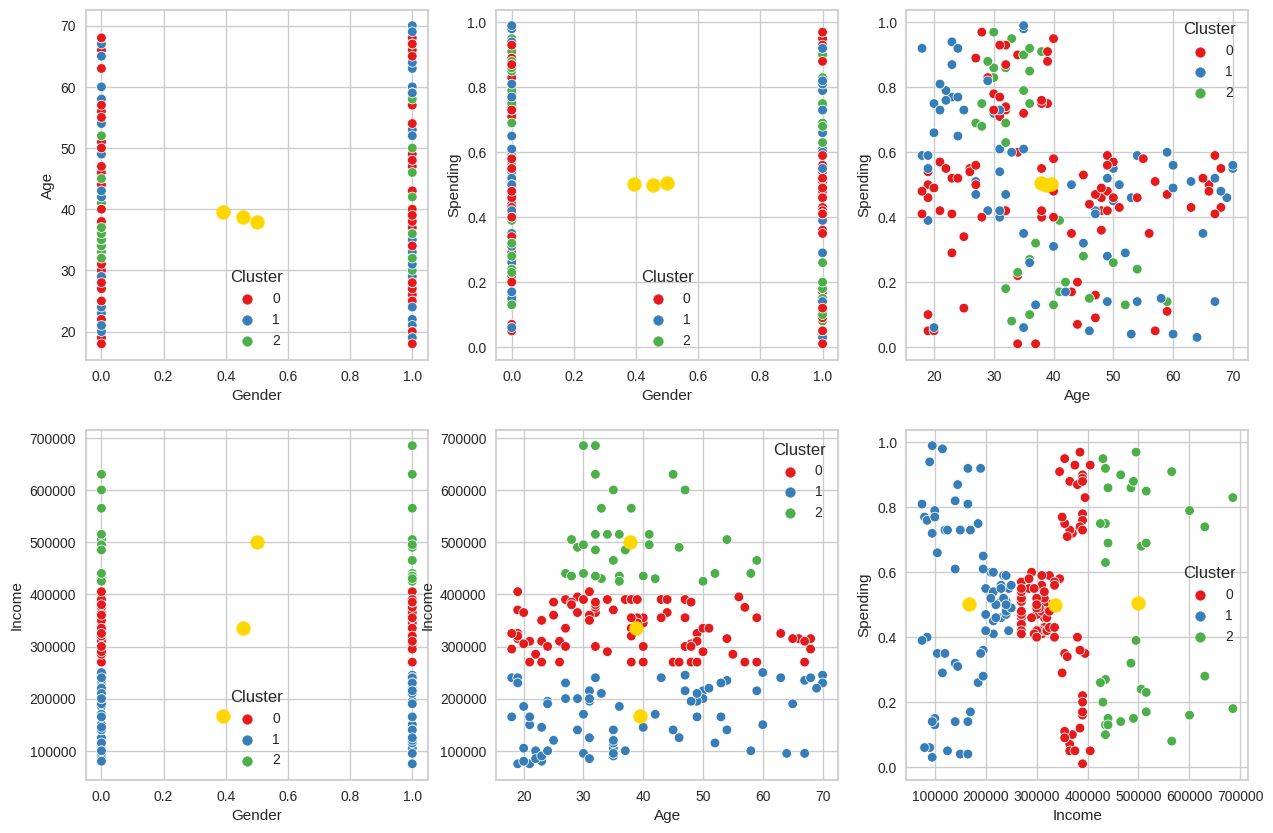

In [ ]:
KM_4fig1, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.scatterplot(x='Gender', y='Age', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[0, 0], legend='full')

sns.scatterplot(x='Gender', y='Income', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1, 0], legend='full')

sns.scatterplot(x='Gender', y='Spending', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[0, 1], legend='full')

sns.scatterplot(x='Age', y='Income', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1, 1], legend='full')

sns.scatterplot(x='Age', y='Spending', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[0, 2], legend='full')

sns.scatterplot(x='Income', y='Spending', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1, 2], legend='full')


axes[0, 0].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,1], marker='o', s=100, c="gold")
axes[1, 0].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='o', s=100, c="gold")
axes[0, 1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,3], marker='o', s=100, c="gold")
axes[1, 1].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='o', s=100, c="gold")
axes[0, 2].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,3], marker='o', s=100, c="gold")
axes[1, 2].scatter(KM_5_clusters.cluster_centers_[:,2],KM_5_clusters.cluster_centers_[:,3], marker='o', s=100, c="gold")
plt.show()
_clusters = KMeans(n_clusters=3, init='k-means++', n_init=10).fit(X_numerics)

KM4_clustered = X_numerics.copy()
KM4_clustered.loc[:,'Cluster'] = KM_4_clusters.labels_

In [ ]:
slht_scr_km = sklearn.metrics.silhouette_score(df, k_cluster.labels_)
slht_scr_km

0.5630723128969357

#KLUSTER HIRARKI

In [ ]:
# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import scipy.cluster.hierarchy as shc
import matplotlib.patches as patches

from matplotlib.patches import Rectangle
from math import isnan
from random import sample
from numpy.random import uniform
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.style import set_palette
from yellowbrick.contrib.wrapper import wrap

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 600
sns.set(rc = {'axes.facecolor': '#FBFBFB', 'figure.facecolor': '#FBFBFB'})
class clr:
    start = '\033[93m'+'\033[1m'
    color = '\033[93m'
    end = '\033[0m'

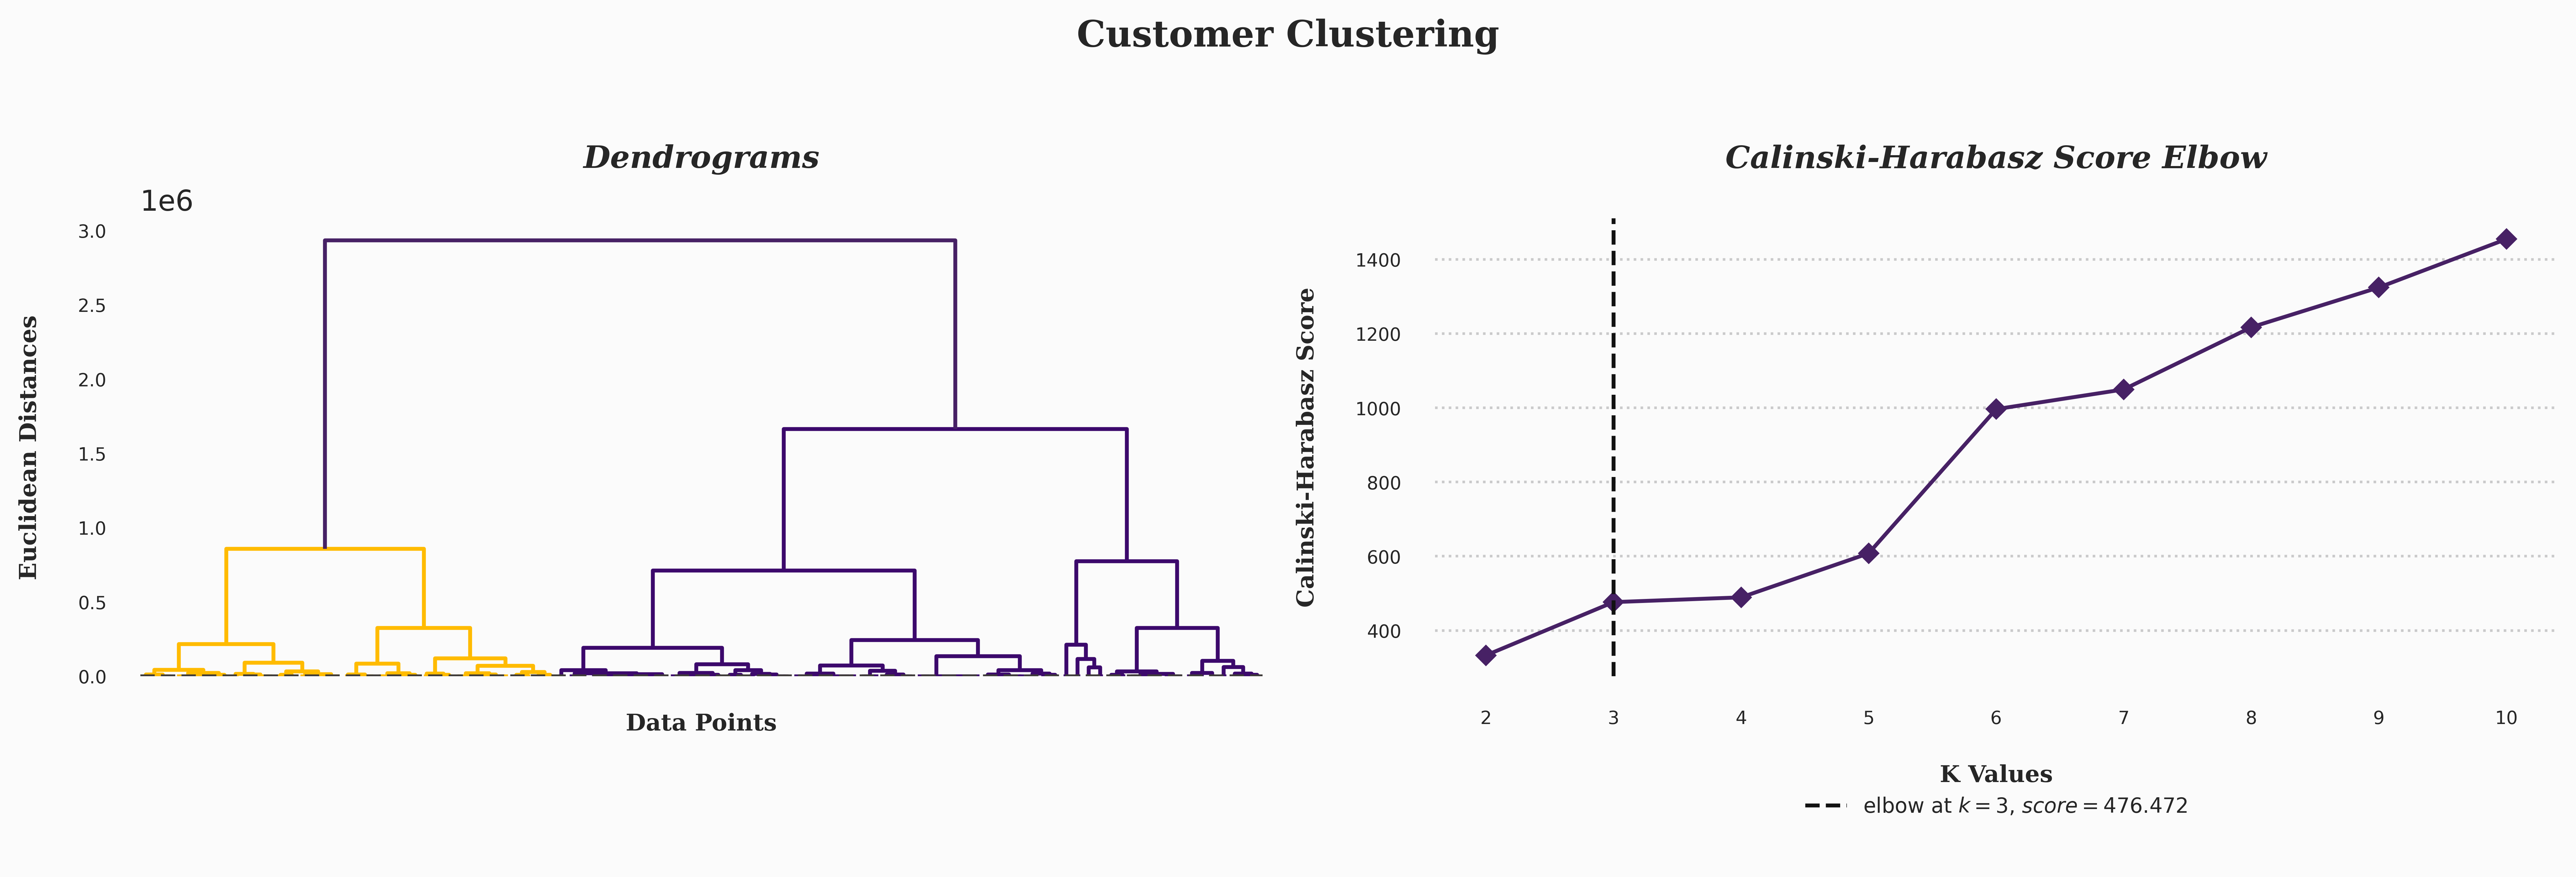

In [ ]:
    # --- Define Dendrogram ---
def agg_dendrogram():

    # --- Figure Settings ---
      color_palette=['#472165', '#FFBB00', '#3C096C', '#9D4EDD', '#FFE270']
      set_palette(color_palette)
      text_style=dict(fontweight='bold', fontfamily='serif')
      ann=dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
      title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
      bbox=dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
      fig=plt.figure(figsize=(14, 5))

        # --- Dendrogram Plot ---
      ax1=fig.add_subplot(1, 2, 1)
      dend=shc.dendrogram(shc.linkage(df, method='ward', metric='euclidean'))
      plt.axhline(y=115, color='#3E3B39', linestyle='--')
      plt.xlabel('\nData Points', fontsize=9, **text_style)
      plt.ylabel('Euclidean Distances\n', fontsize=9, **text_style)
      plt.annotate('Horizontal Cut Line', xy=(15000, 130), xytext=(1, 1), fontsize=8, bbox=bbox, **ann)
      plt.tick_params(labelbottom=False)
      for spine in ax1.spines.values():
            spine.set_color('None')
      plt.grid(axis='both', alpha=0)
      plt.tick_params(labelsize=7)
      plt.title('Dendrograms\n', **title)

        # --- Elbow Score (Calinski-Harabasz Index) ---
      ax2=fig.add_subplot(1, 2, 2)
      elbow_score_ch = KElbowVisualizer(AgglomerativeClustering(), metric='calinski_harabasz', timings=False, ax=ax2)
      elbow_score_ch.fit(df)
      elbow_score_ch.finalize()
      elbow_score_ch.ax.set_title('Calinski-Harabasz Score Elbow\n', **title)
      elbow_score_ch.ax.tick_params(labelsize=7)
      for text in elbow_score_ch.ax.legend_.texts:
            text.set_fontsize(9)
      for spine in elbow_score_ch.ax.spines.values():
            spine.set_color('None')
      elbow_score_ch.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), borderpad=2, frameon=False, fontsize=8)
      elbow_score_ch.ax.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
      elbow_score_ch.ax.grid(axis='x', alpha=0)
      elbow_score_ch.ax.set_xlabel('\nK Values', fontsize=9, **text_style)
      elbow_score_ch.ax.set_ylabel('Calinski-Harabasz Score\n', fontsize=9, **text_style)

      plt.suptitle('Customer Clustering\n', fontsize=14, **text_style)
      plt.tight_layout()
      plt.show();

# --- Calling Dendrogram Functions ---
agg_dendrogram();

In [ ]:
for nc in range(2,7):
    h_cluster = AgglomerativeClustering(n_clusters=nc, linkage='complete',affinity = "euclidean").fit(df)
    cluster_labels=pd.Series(h_cluster.labels_)
    slht_scr= sklearn.metrics.silhouette_score(df, cluster_labels)
    print("For n_clusters =", nc,"The average silhouette_score is :", slht_scr)

For n_clusters = 2 The average silhouette_score is : 0.560844634422695
For n_clusters = 3 The average silhouette_score is : 0.5480202713196561
For n_clusters = 4 The average silhouette_score is : 0.5541820589451218
For n_clusters = 5 The average silhouette_score is : 0.522723796015266
For n_clusters = 6 The average silhouette_score is : 0.6030563009403572


In [ ]:
h_cluster = AgglomerativeClustering(n_clusters=3, linkage='complete',affinity = "euclidean").fit(df)
cluster_labels=pd.Series(h_cluster.labels_)
cluster_labels
datanew = pd.concat([df, pd.DataFrame({'cluster':cluster_labels})])
datanew.head()

,Gender,Age,Income,Spending,cluster,PCA1,PCA2
0,0.0,47.0,600240.0,0.16,1,297318.879986,8.544080
1,1.0,60.0,150060.0,0.04,0,-152861.120031,20.952673
2,1.0,63.0,240096.0,0.51,0,-62825.120035,24.068796
3,1.0,48.0,270108.0,0.46,2,-32813.120008,9.106899
4,0.0,35.0,105042.0,0.35,0,-197879.119998,-4.110381


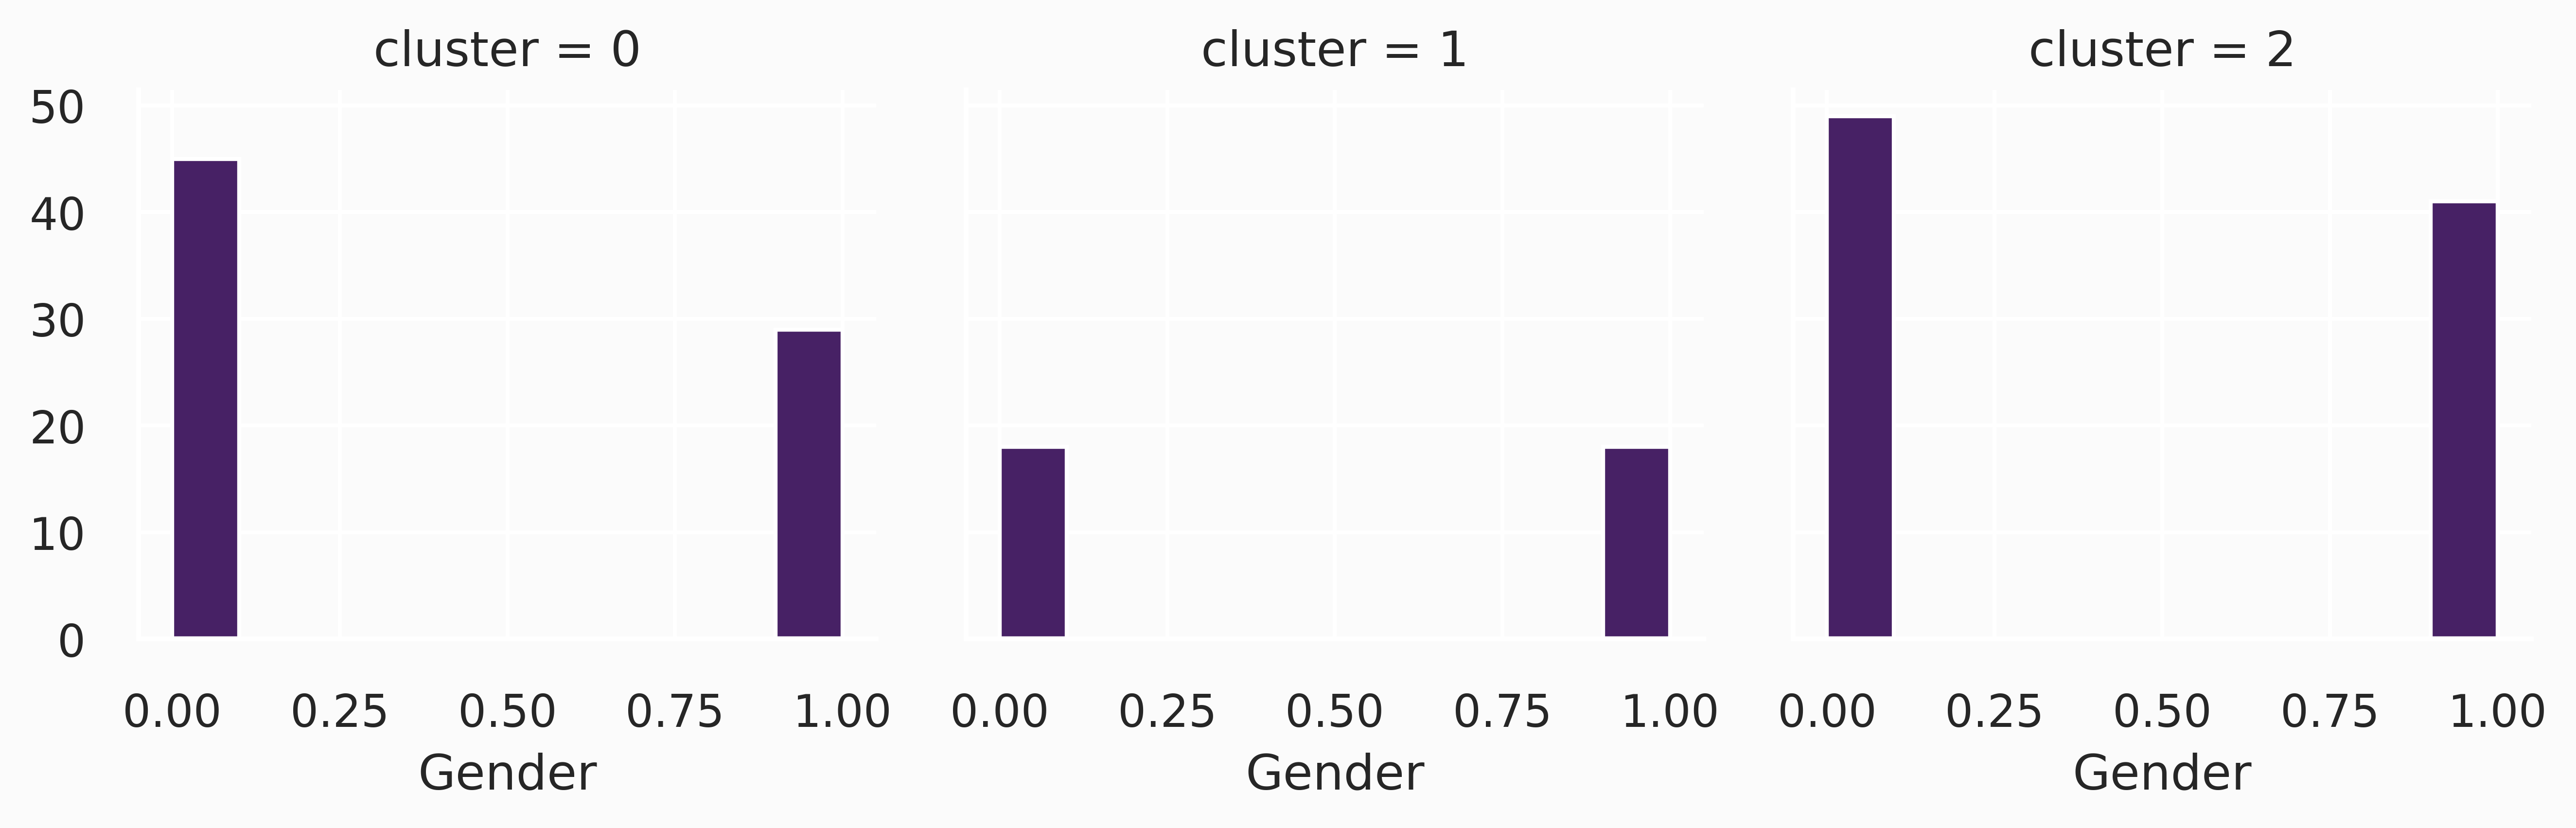

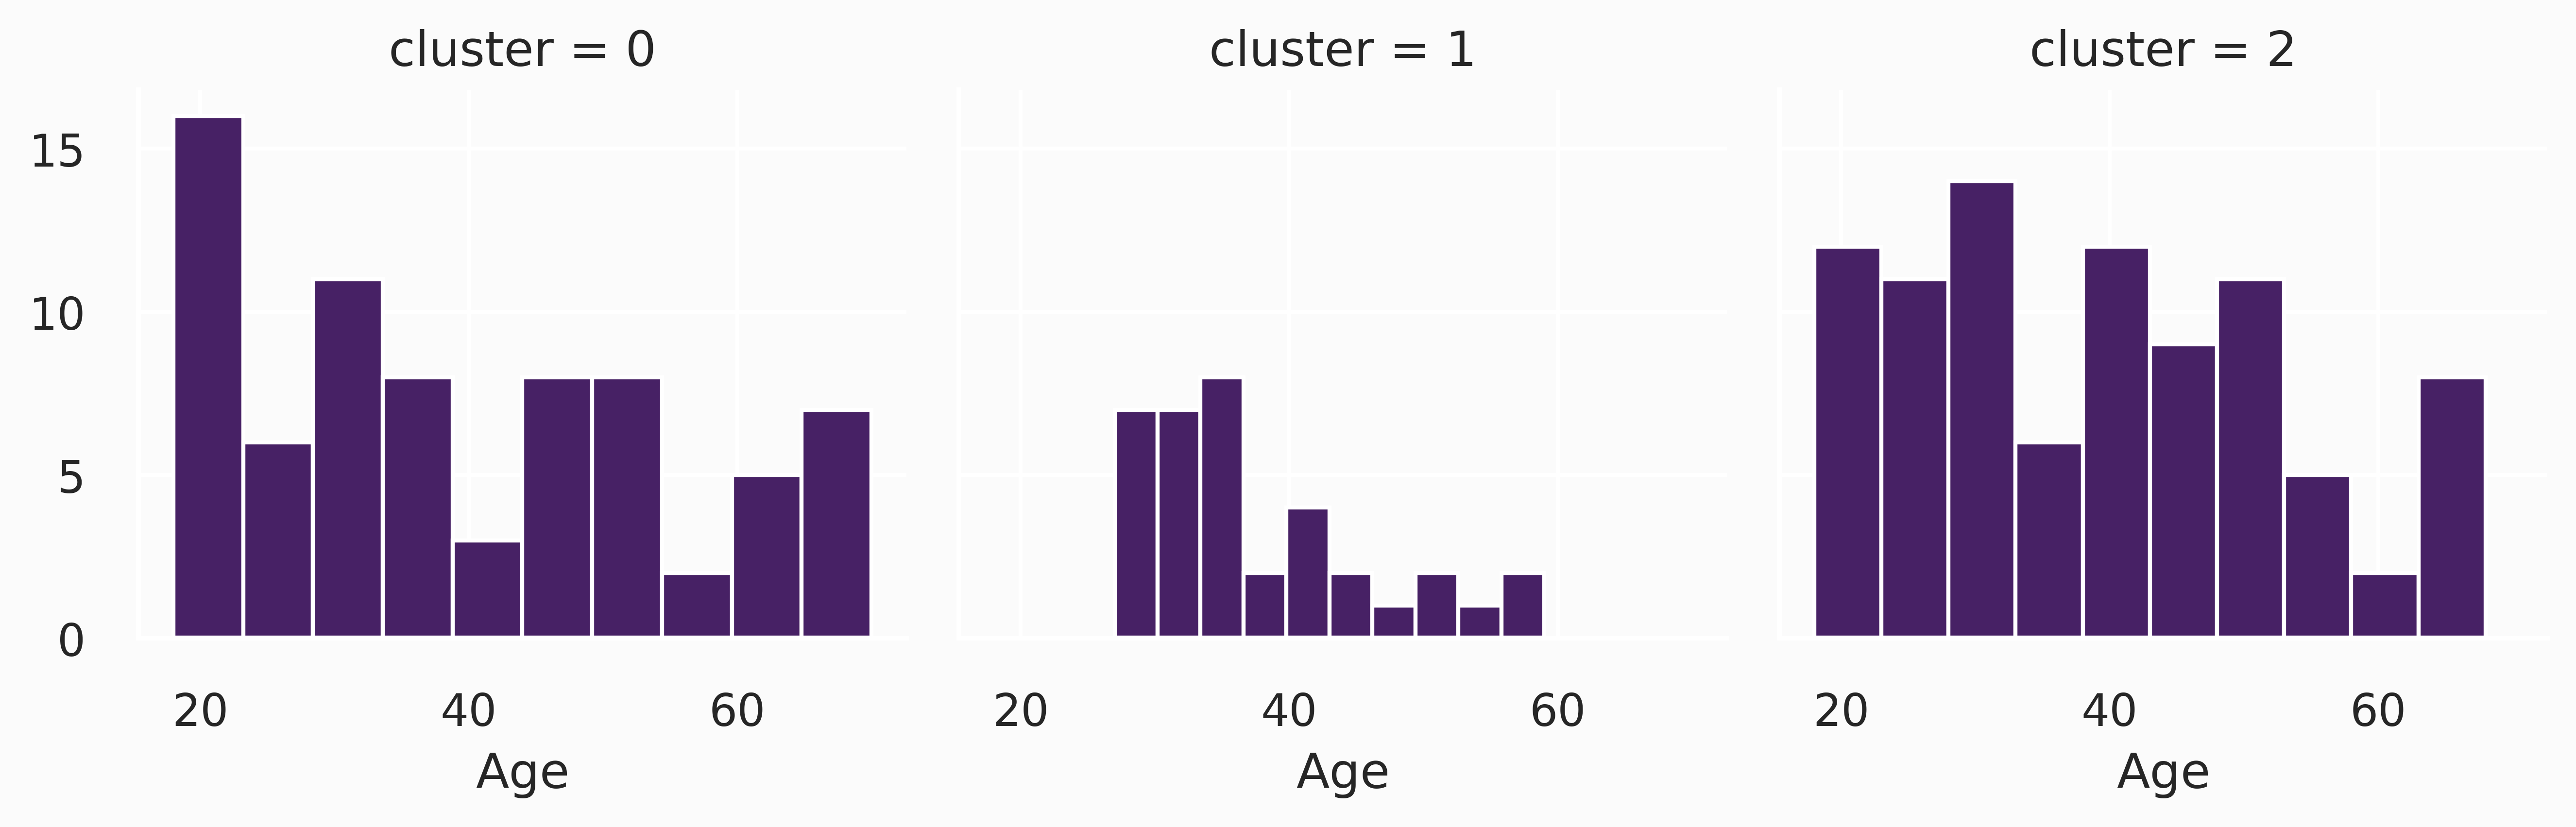

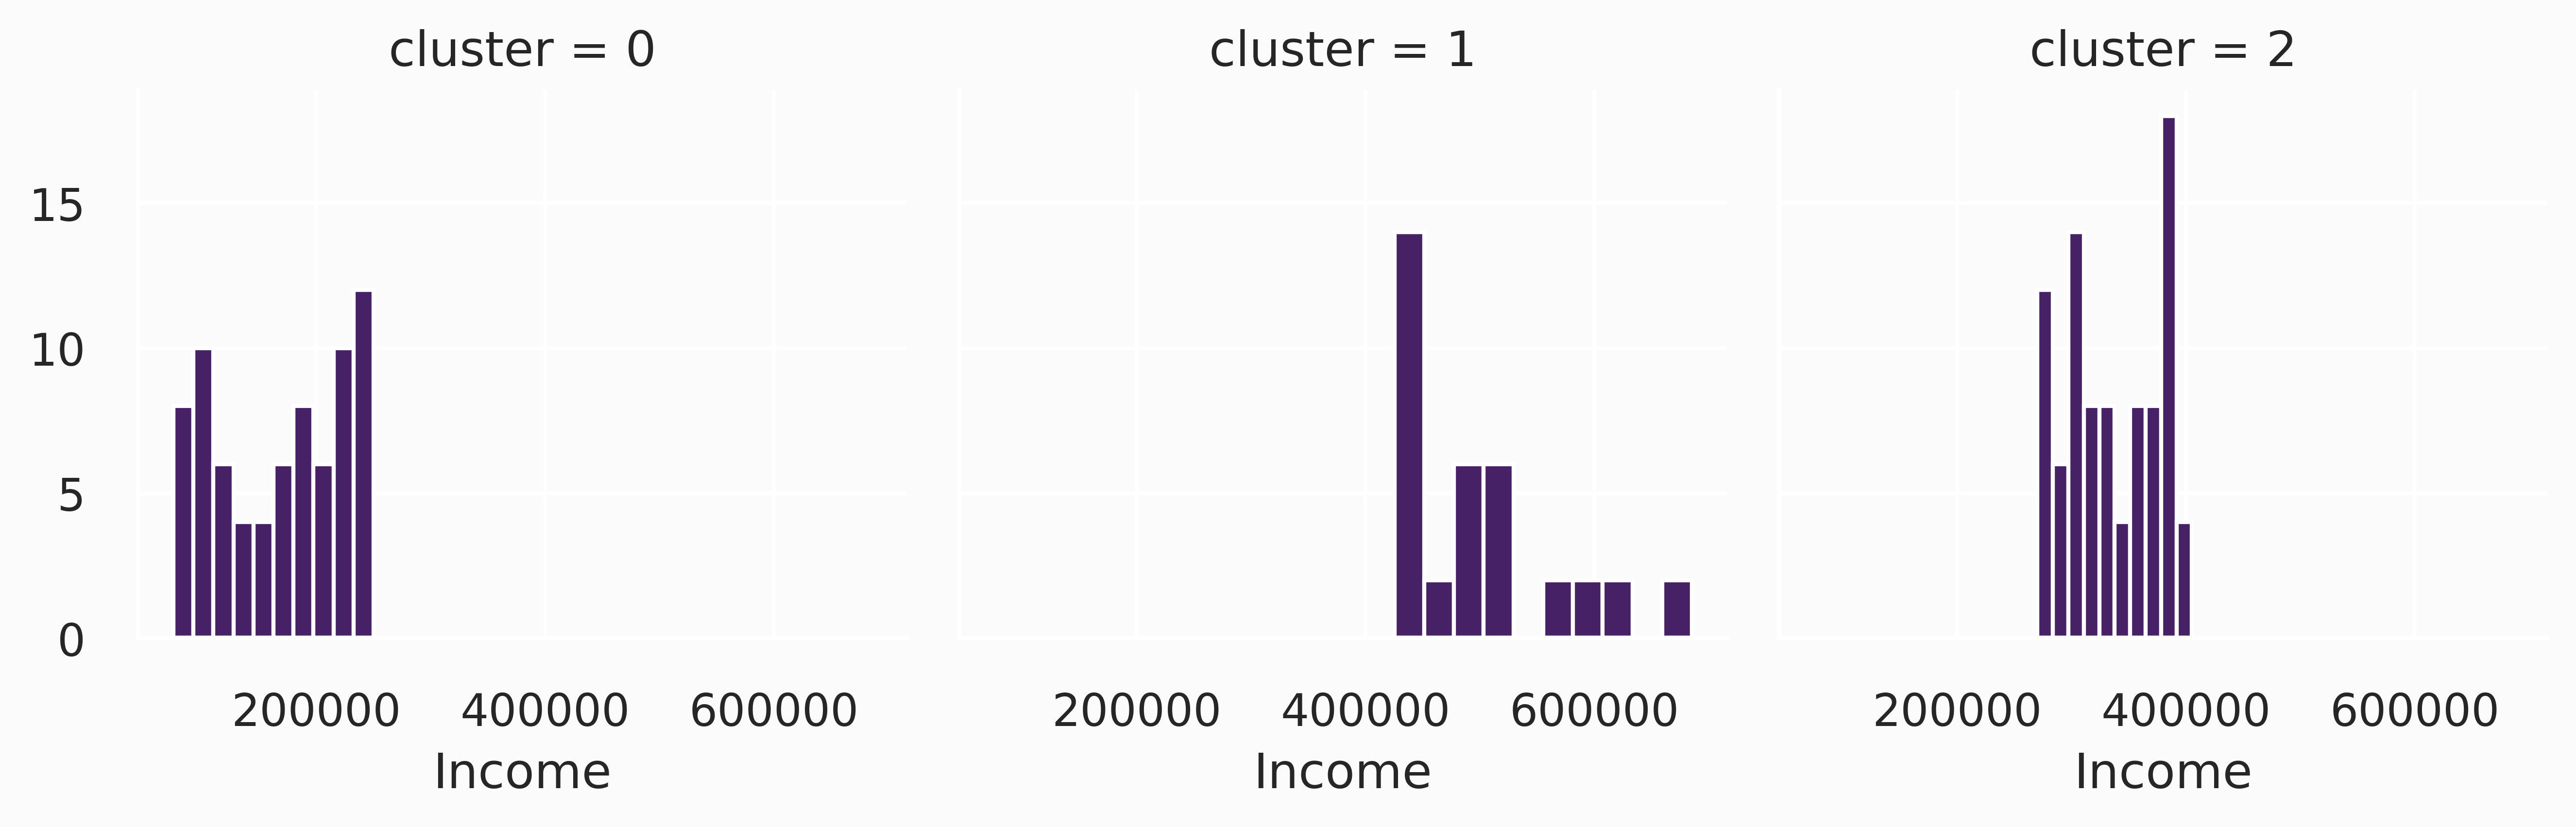

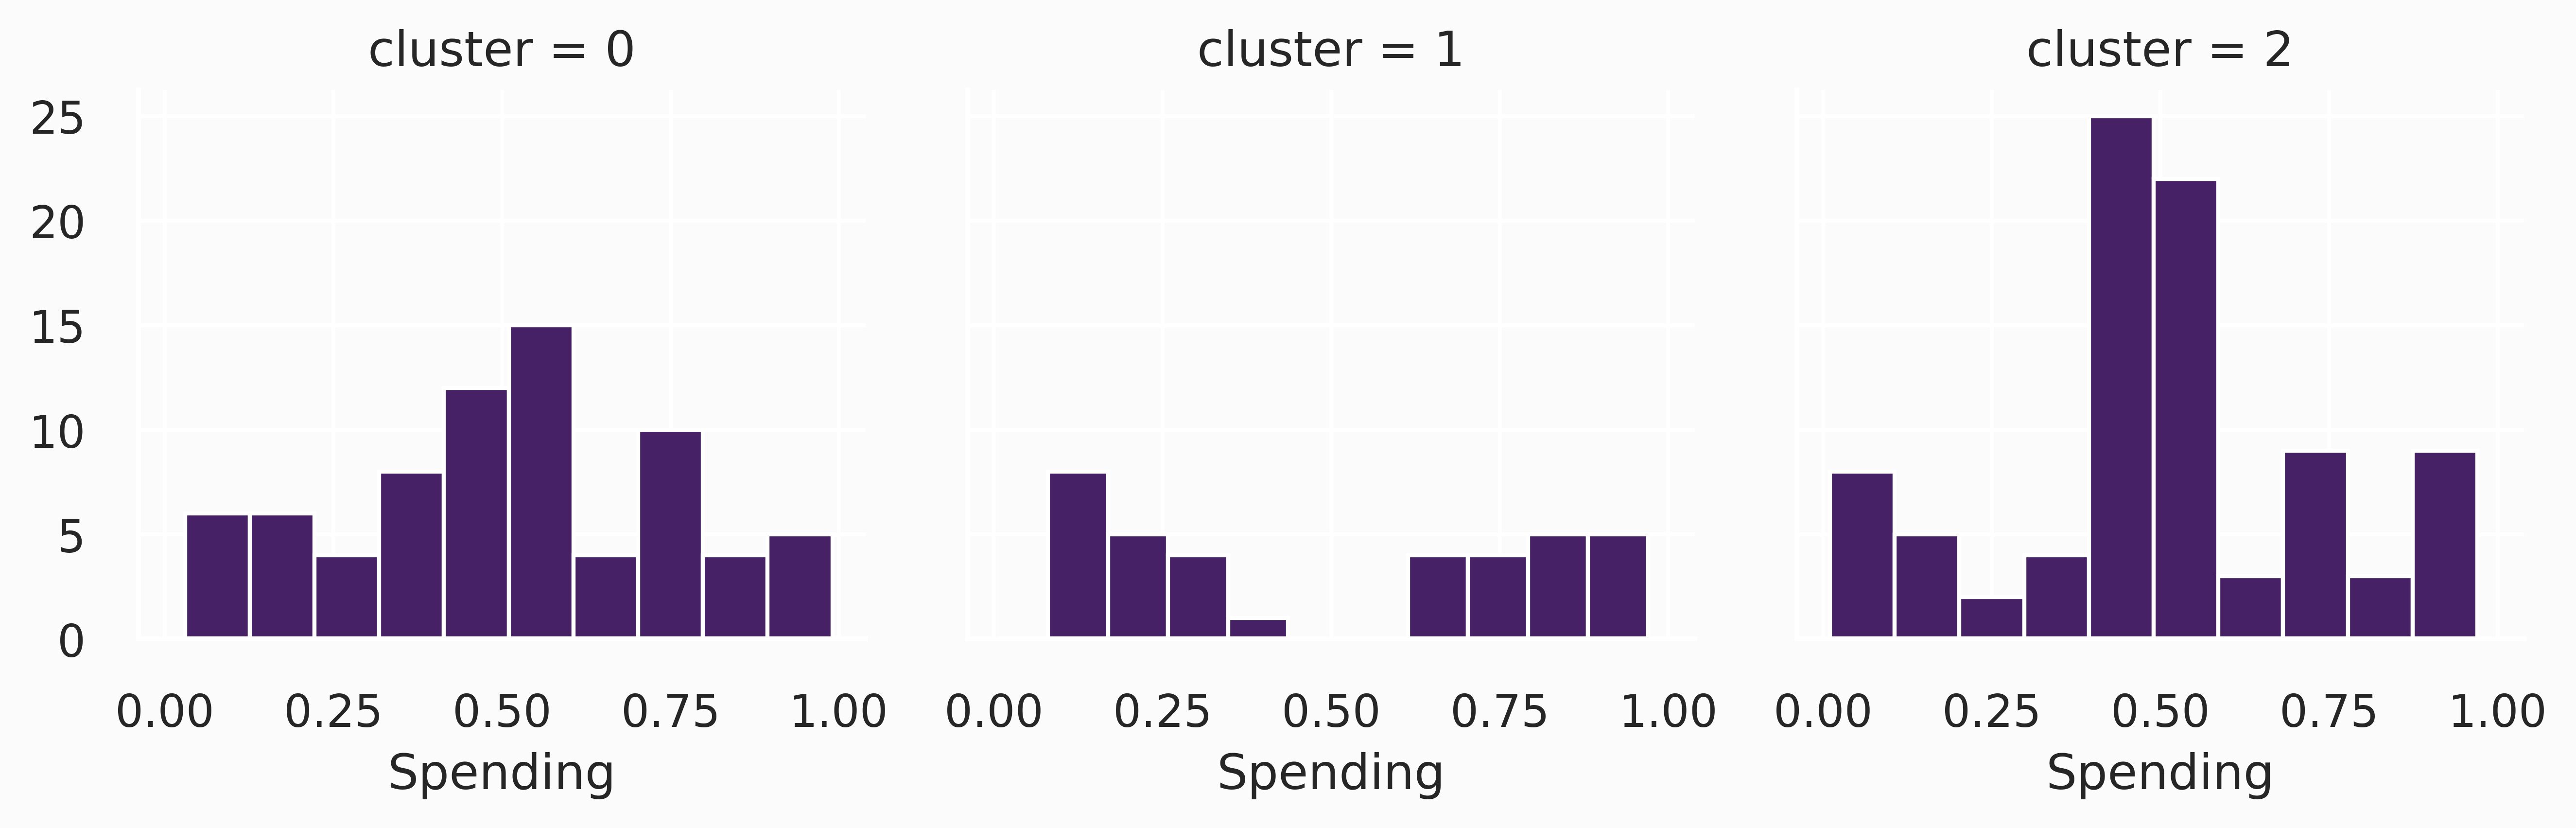

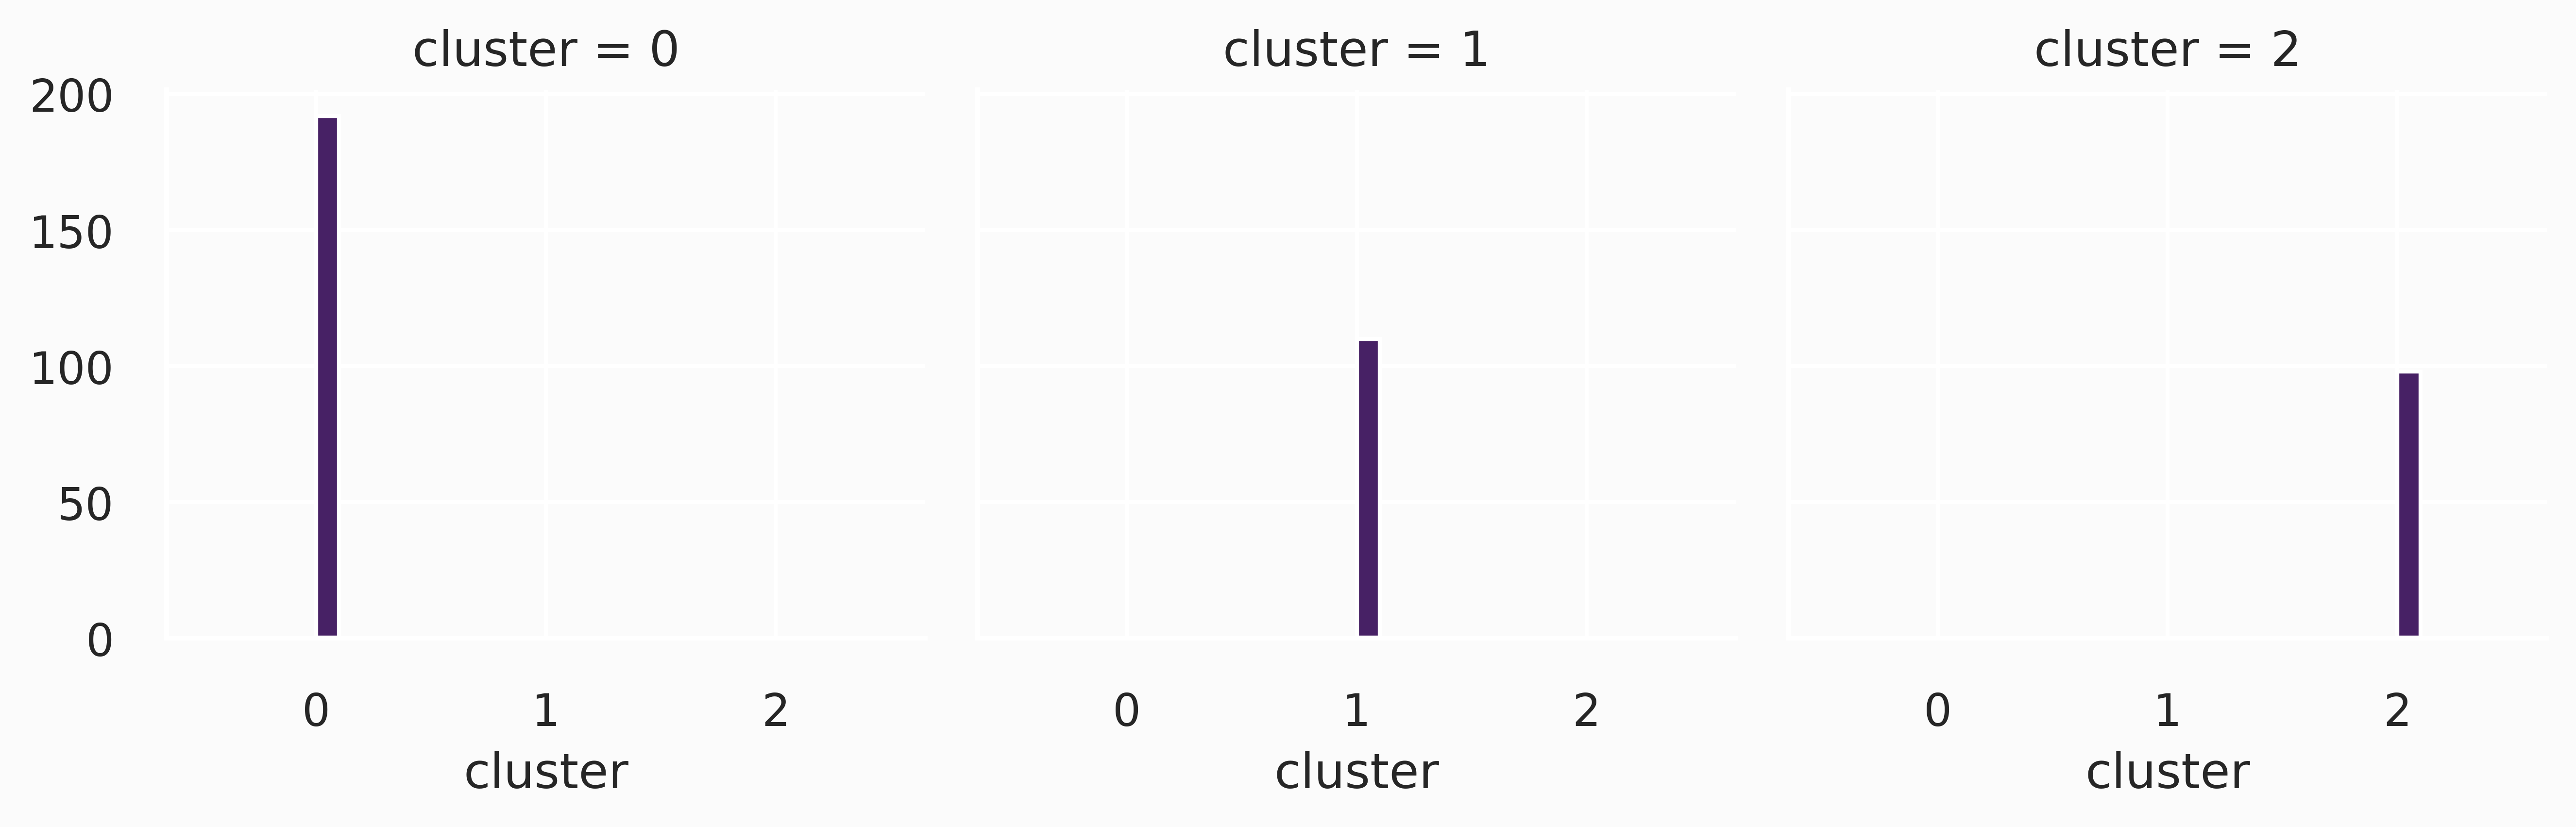

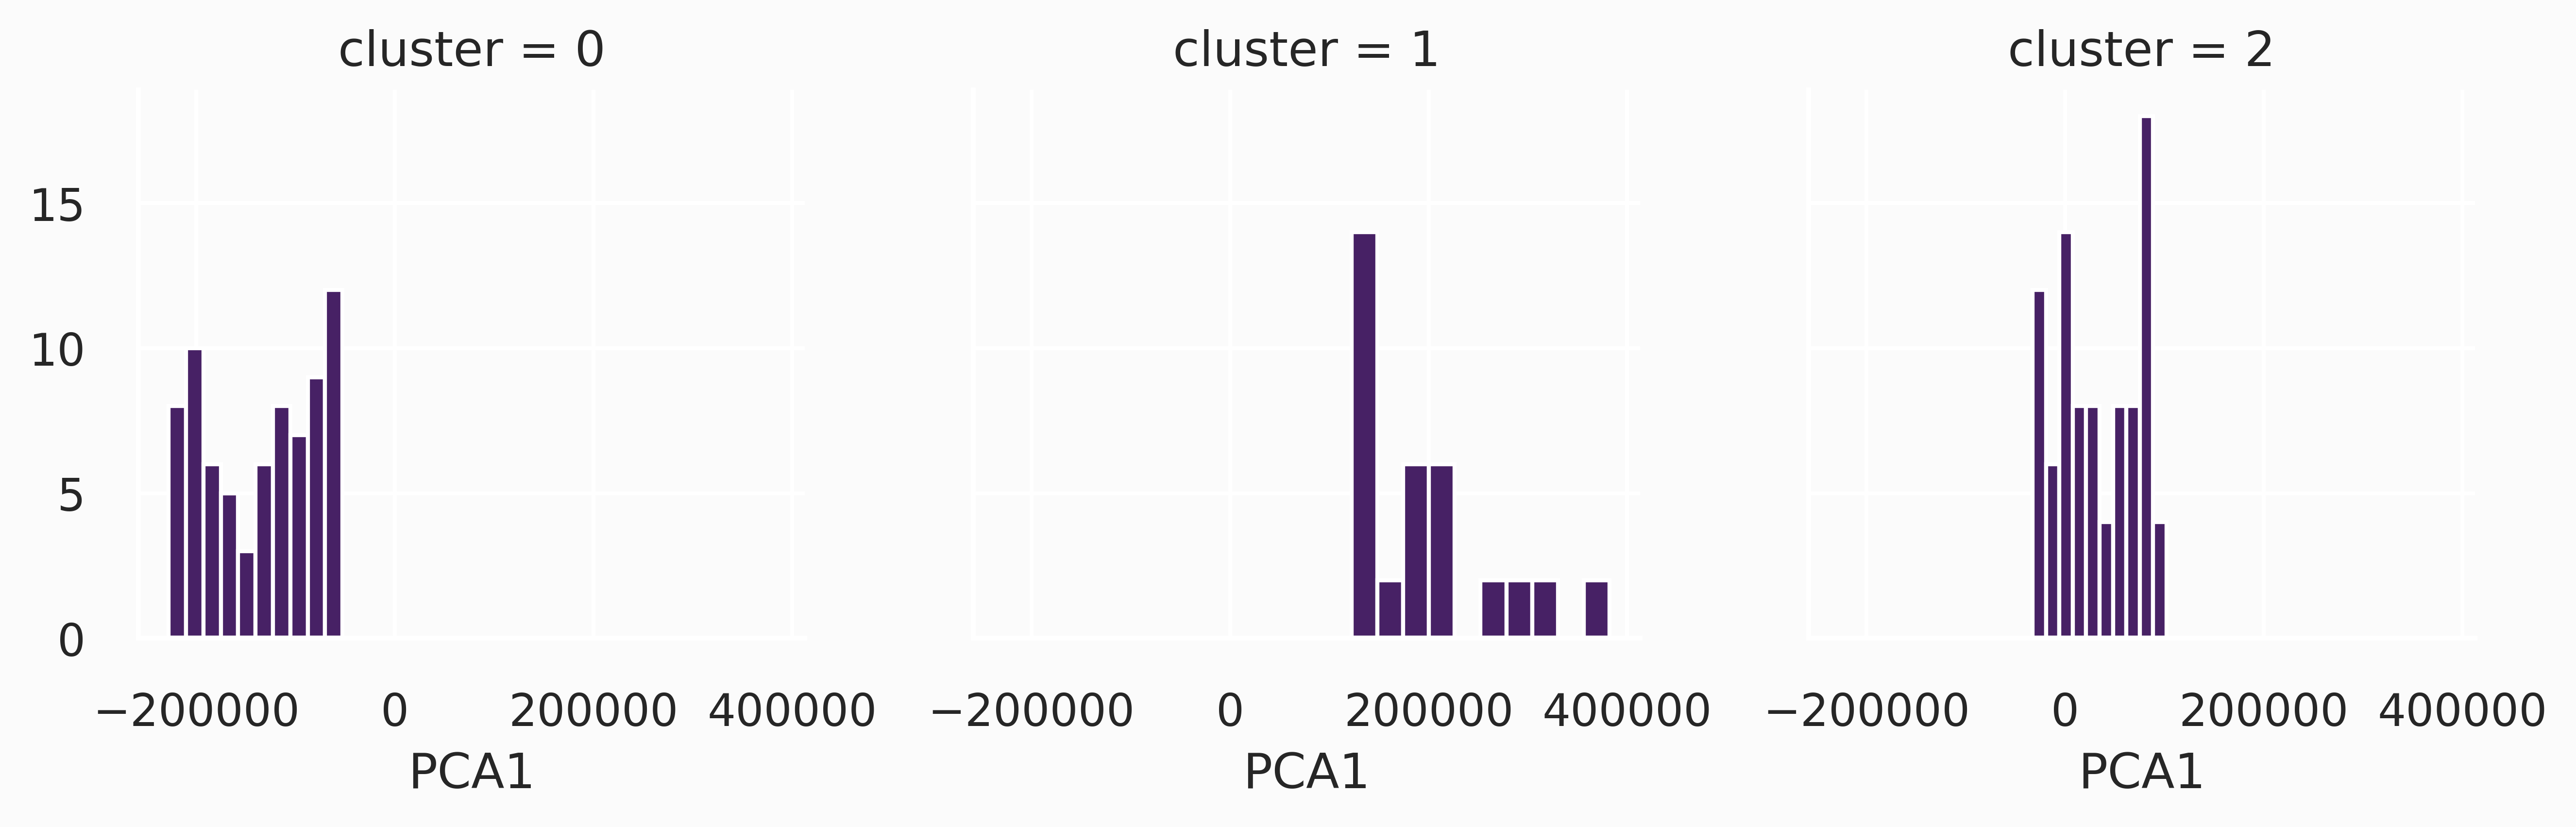

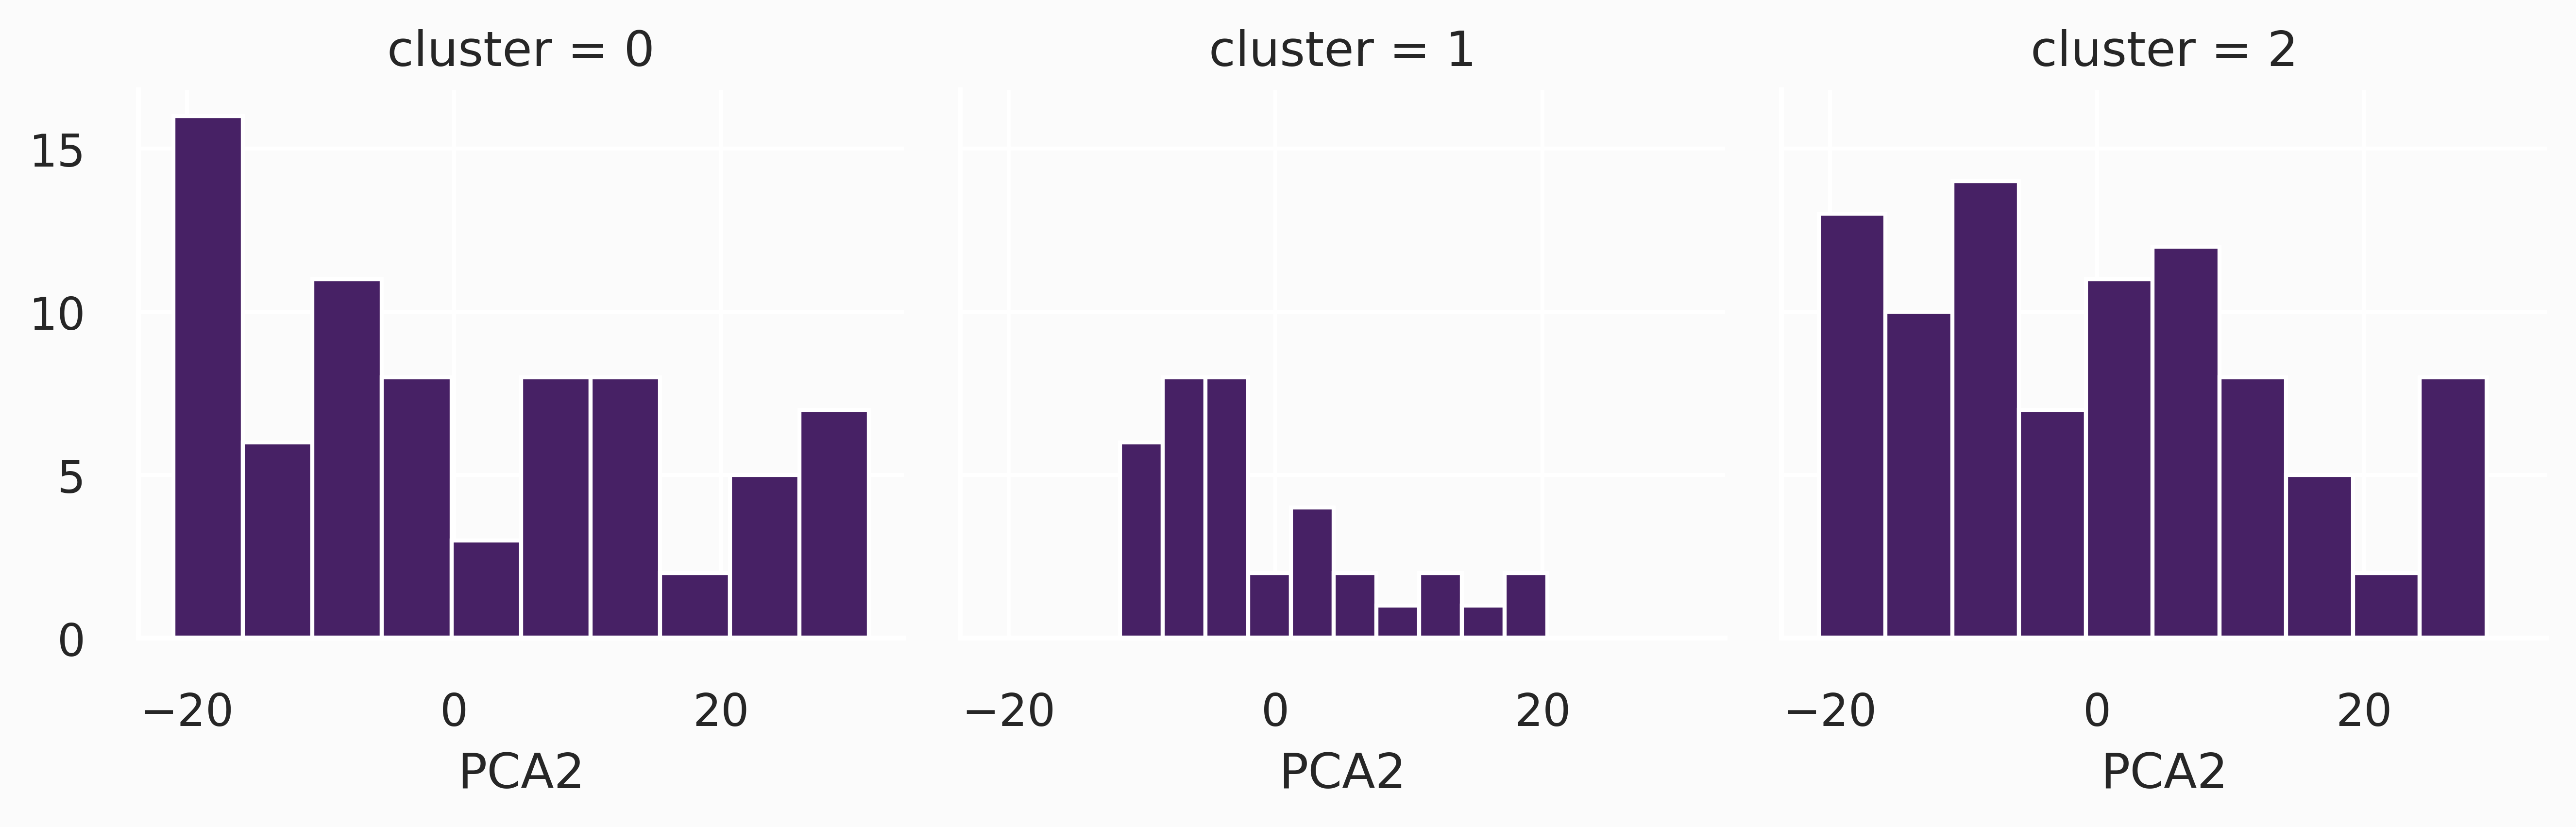

In [ ]:
for i in datanew:
  grid = sns.FacetGrid(datanew, col='cluster')
  grid.map(plt.hist, i)

In [ ]:
dist = 1 - cosine_similarity(df)

pca = PCA(n_components = 2)
pca = pca.fit_transform(dist)

In [ ]:
x, y = pca[:, 0], pca[:, 1]

warna = {0: 'red',
         1: 'blue',
         2: 'green'}
label_pca = {0: 'cluster 0',
             1: 'cluster 1',
             2: 'cluster 2'}
scaleddata = pd.DataFrame({'x': x, 'y': y, 'label':cluster_labels})
groups = scaleddata.groupby('label')

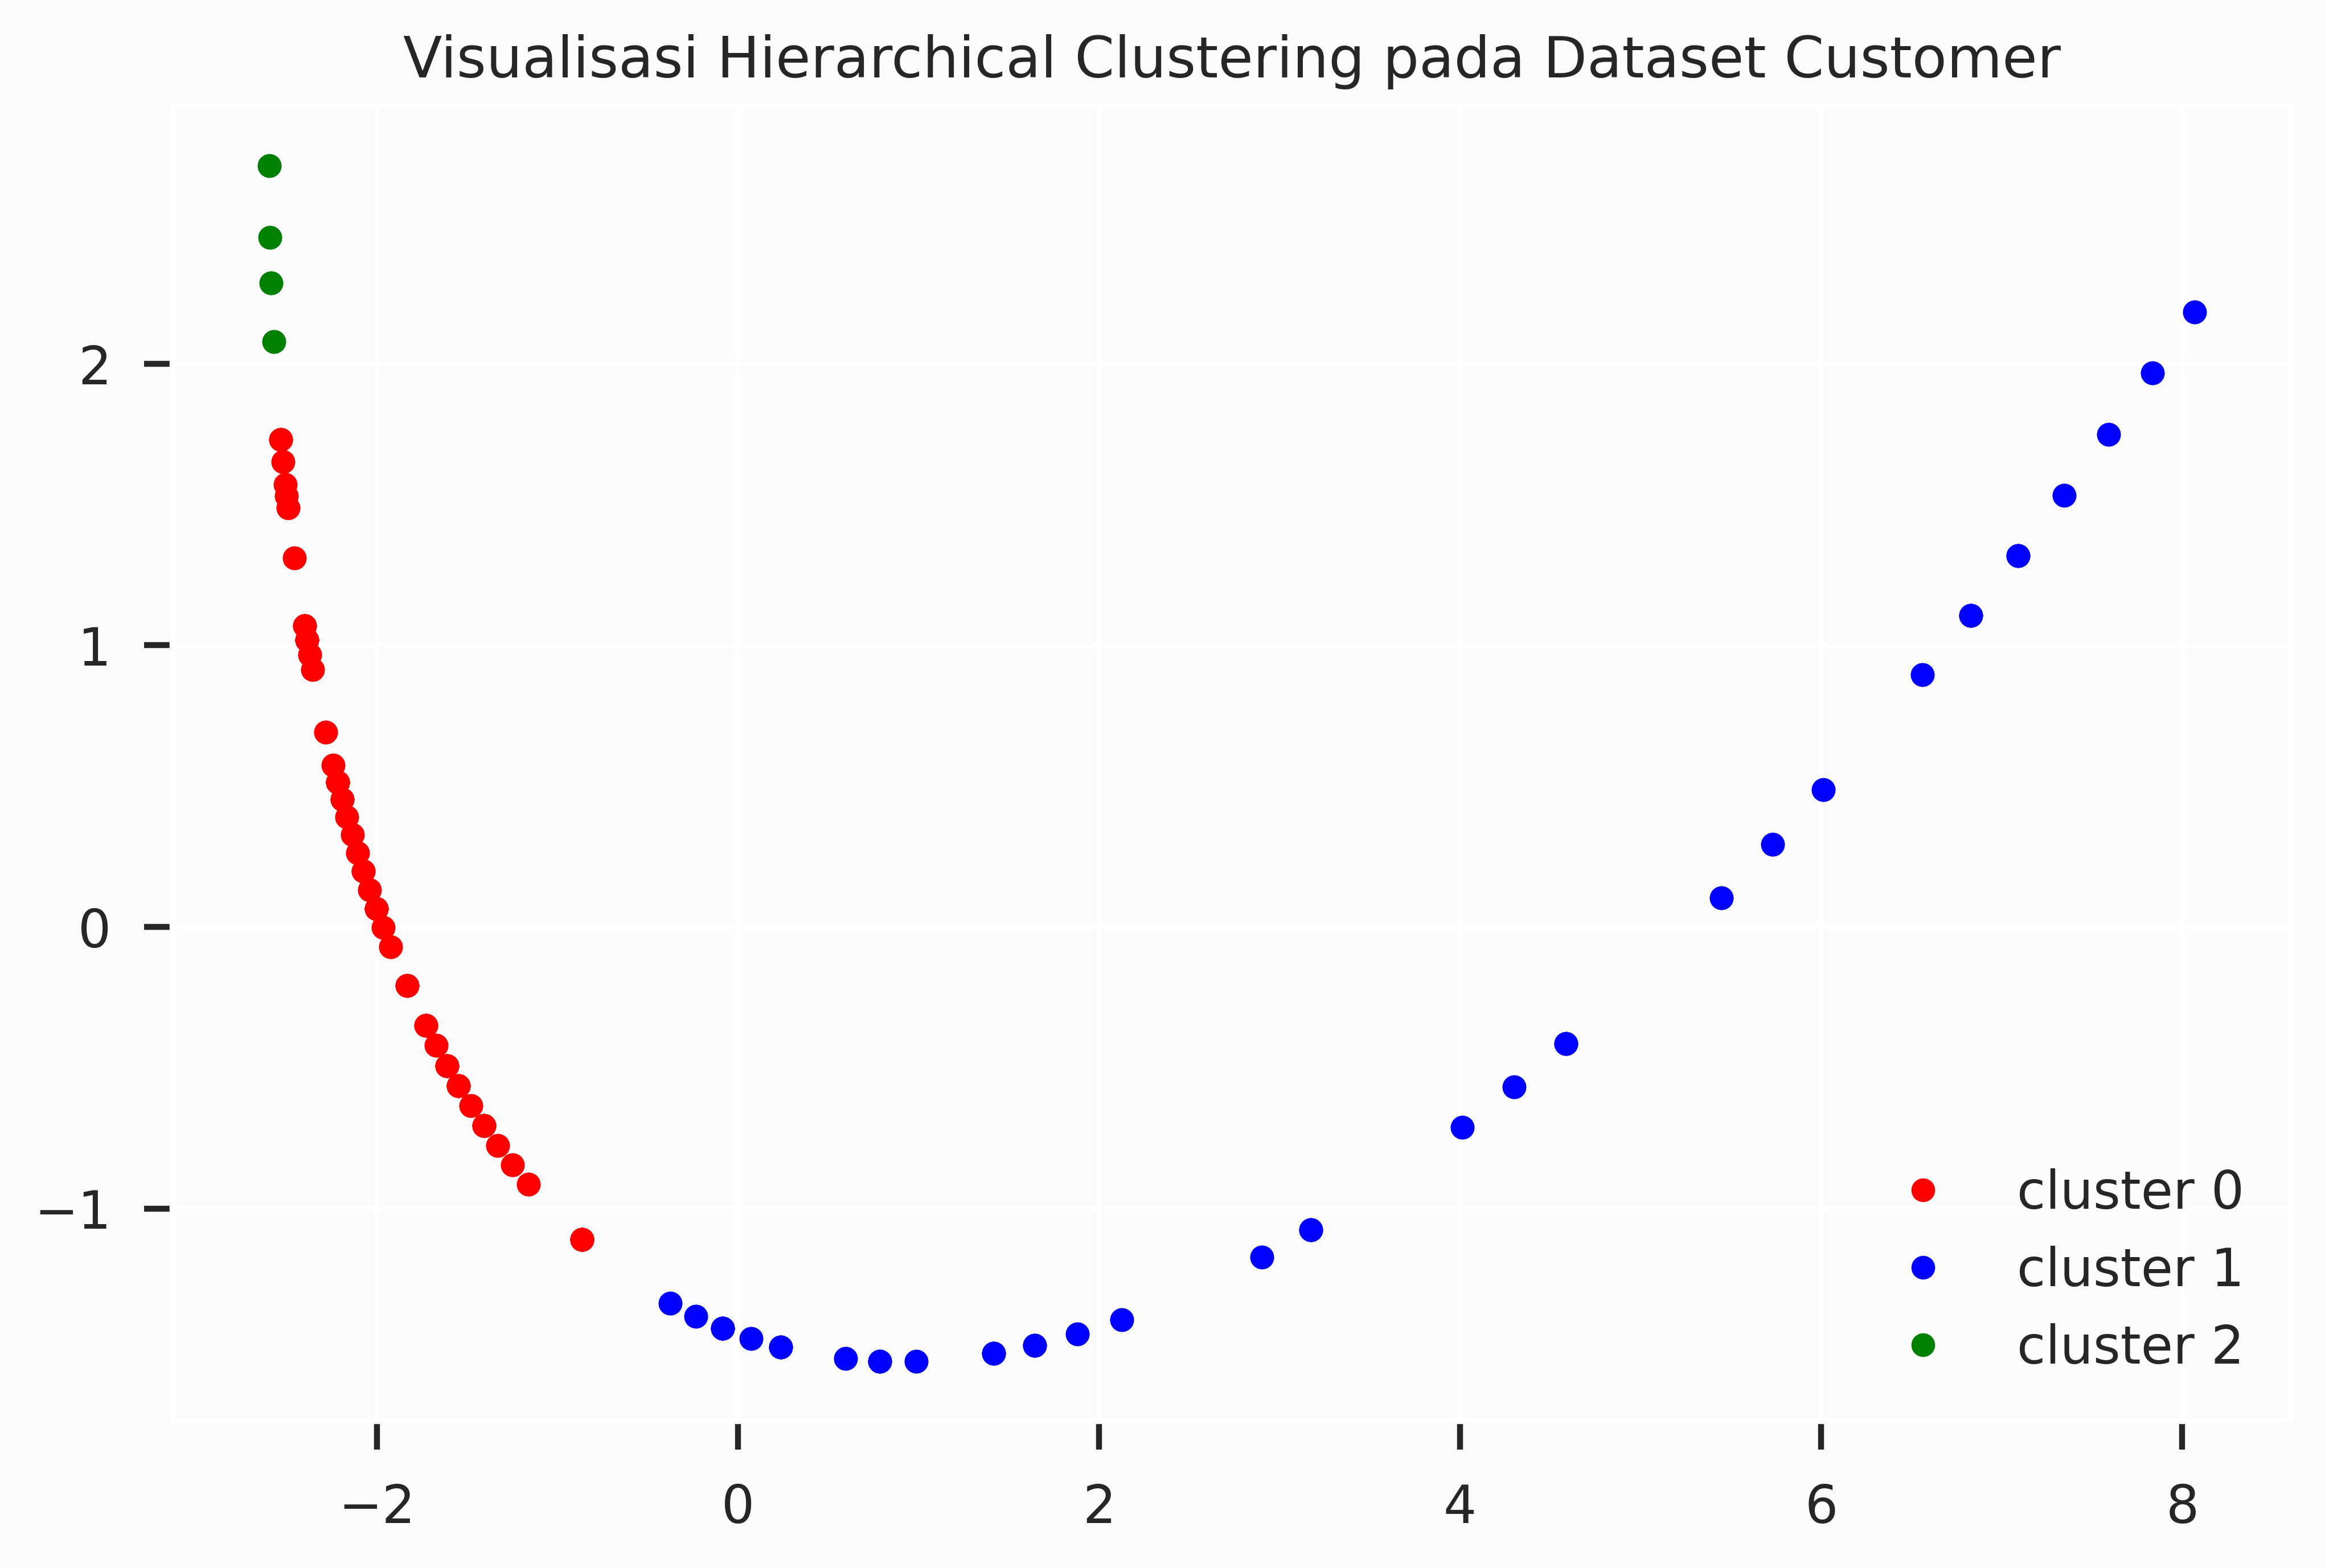

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

for name, group in groups:
  ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
          color=warna[name], label=label_pca[name], mec='none')
  ax.set_aspect('auto')
  ax.tick_params(axis='x', which='both', bottom='off', labelbottom='off')
  ax.tick_params(axis='y', which='both', left='off', labelleft='off')

ax.legend()
ax.set_title('Visualisasi Hierarchical Clustering pada Dataset Customer')
plt.show()

In [ ]:
slht_scr_hrc = sklearn.metrics.silhouette_score(scaleddata, cluster_labels)
slht_scr_hrc

0.5025440766591031

#DBSCAN

In [ ]:
nn = NearestNeighbors(n_neighbors=8)
nn = nn.fit(df)
distances, indices = nn.kneighbors(df)

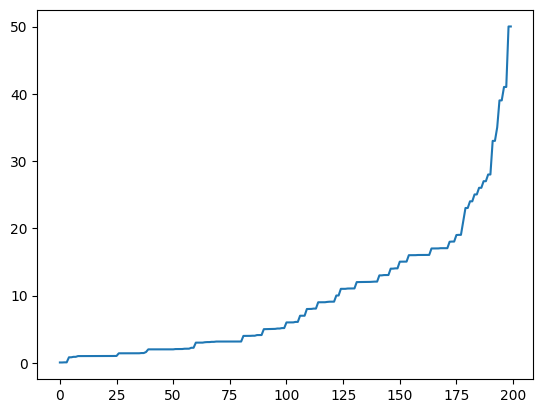

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN

# Assuming df is your NumPy array
# Convert NumPy array to DataFrame
df = pd.DataFrame(df)

# Reset the index
df_reset = df.reset_index(drop=True)

# Apply DBSCAN
d_cluster = DBSCAN(eps=1.125, min_samples=5)
df_reset['cluster'] = d_cluster.fit_predict(df_reset)

# Check the results
print(df_reset.head(70))

    Gender  Age  Income  Spending  cluster
0        0   47  600240      0.16       -1
1        1   60  150060      0.04       -1
2        1   63  240096      0.51       -1
3        1   48  270108      0.46       -1
4        0   35  105042      0.35       -1
..     ...  ...     ...       ...      ...
65       1   19  240096      0.59       -1
66       1   66  315126      0.48       -1
67       0   27  390156      0.89       -1
68       0   29  490196      0.88       -1
69       1   49  310124      0.56       -1

[70 rows x 5 columns]


In [ ]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(df)
df['PCA1'] = data_2d[:, 0]
df['PCA2'] = data_2d[:, 1]

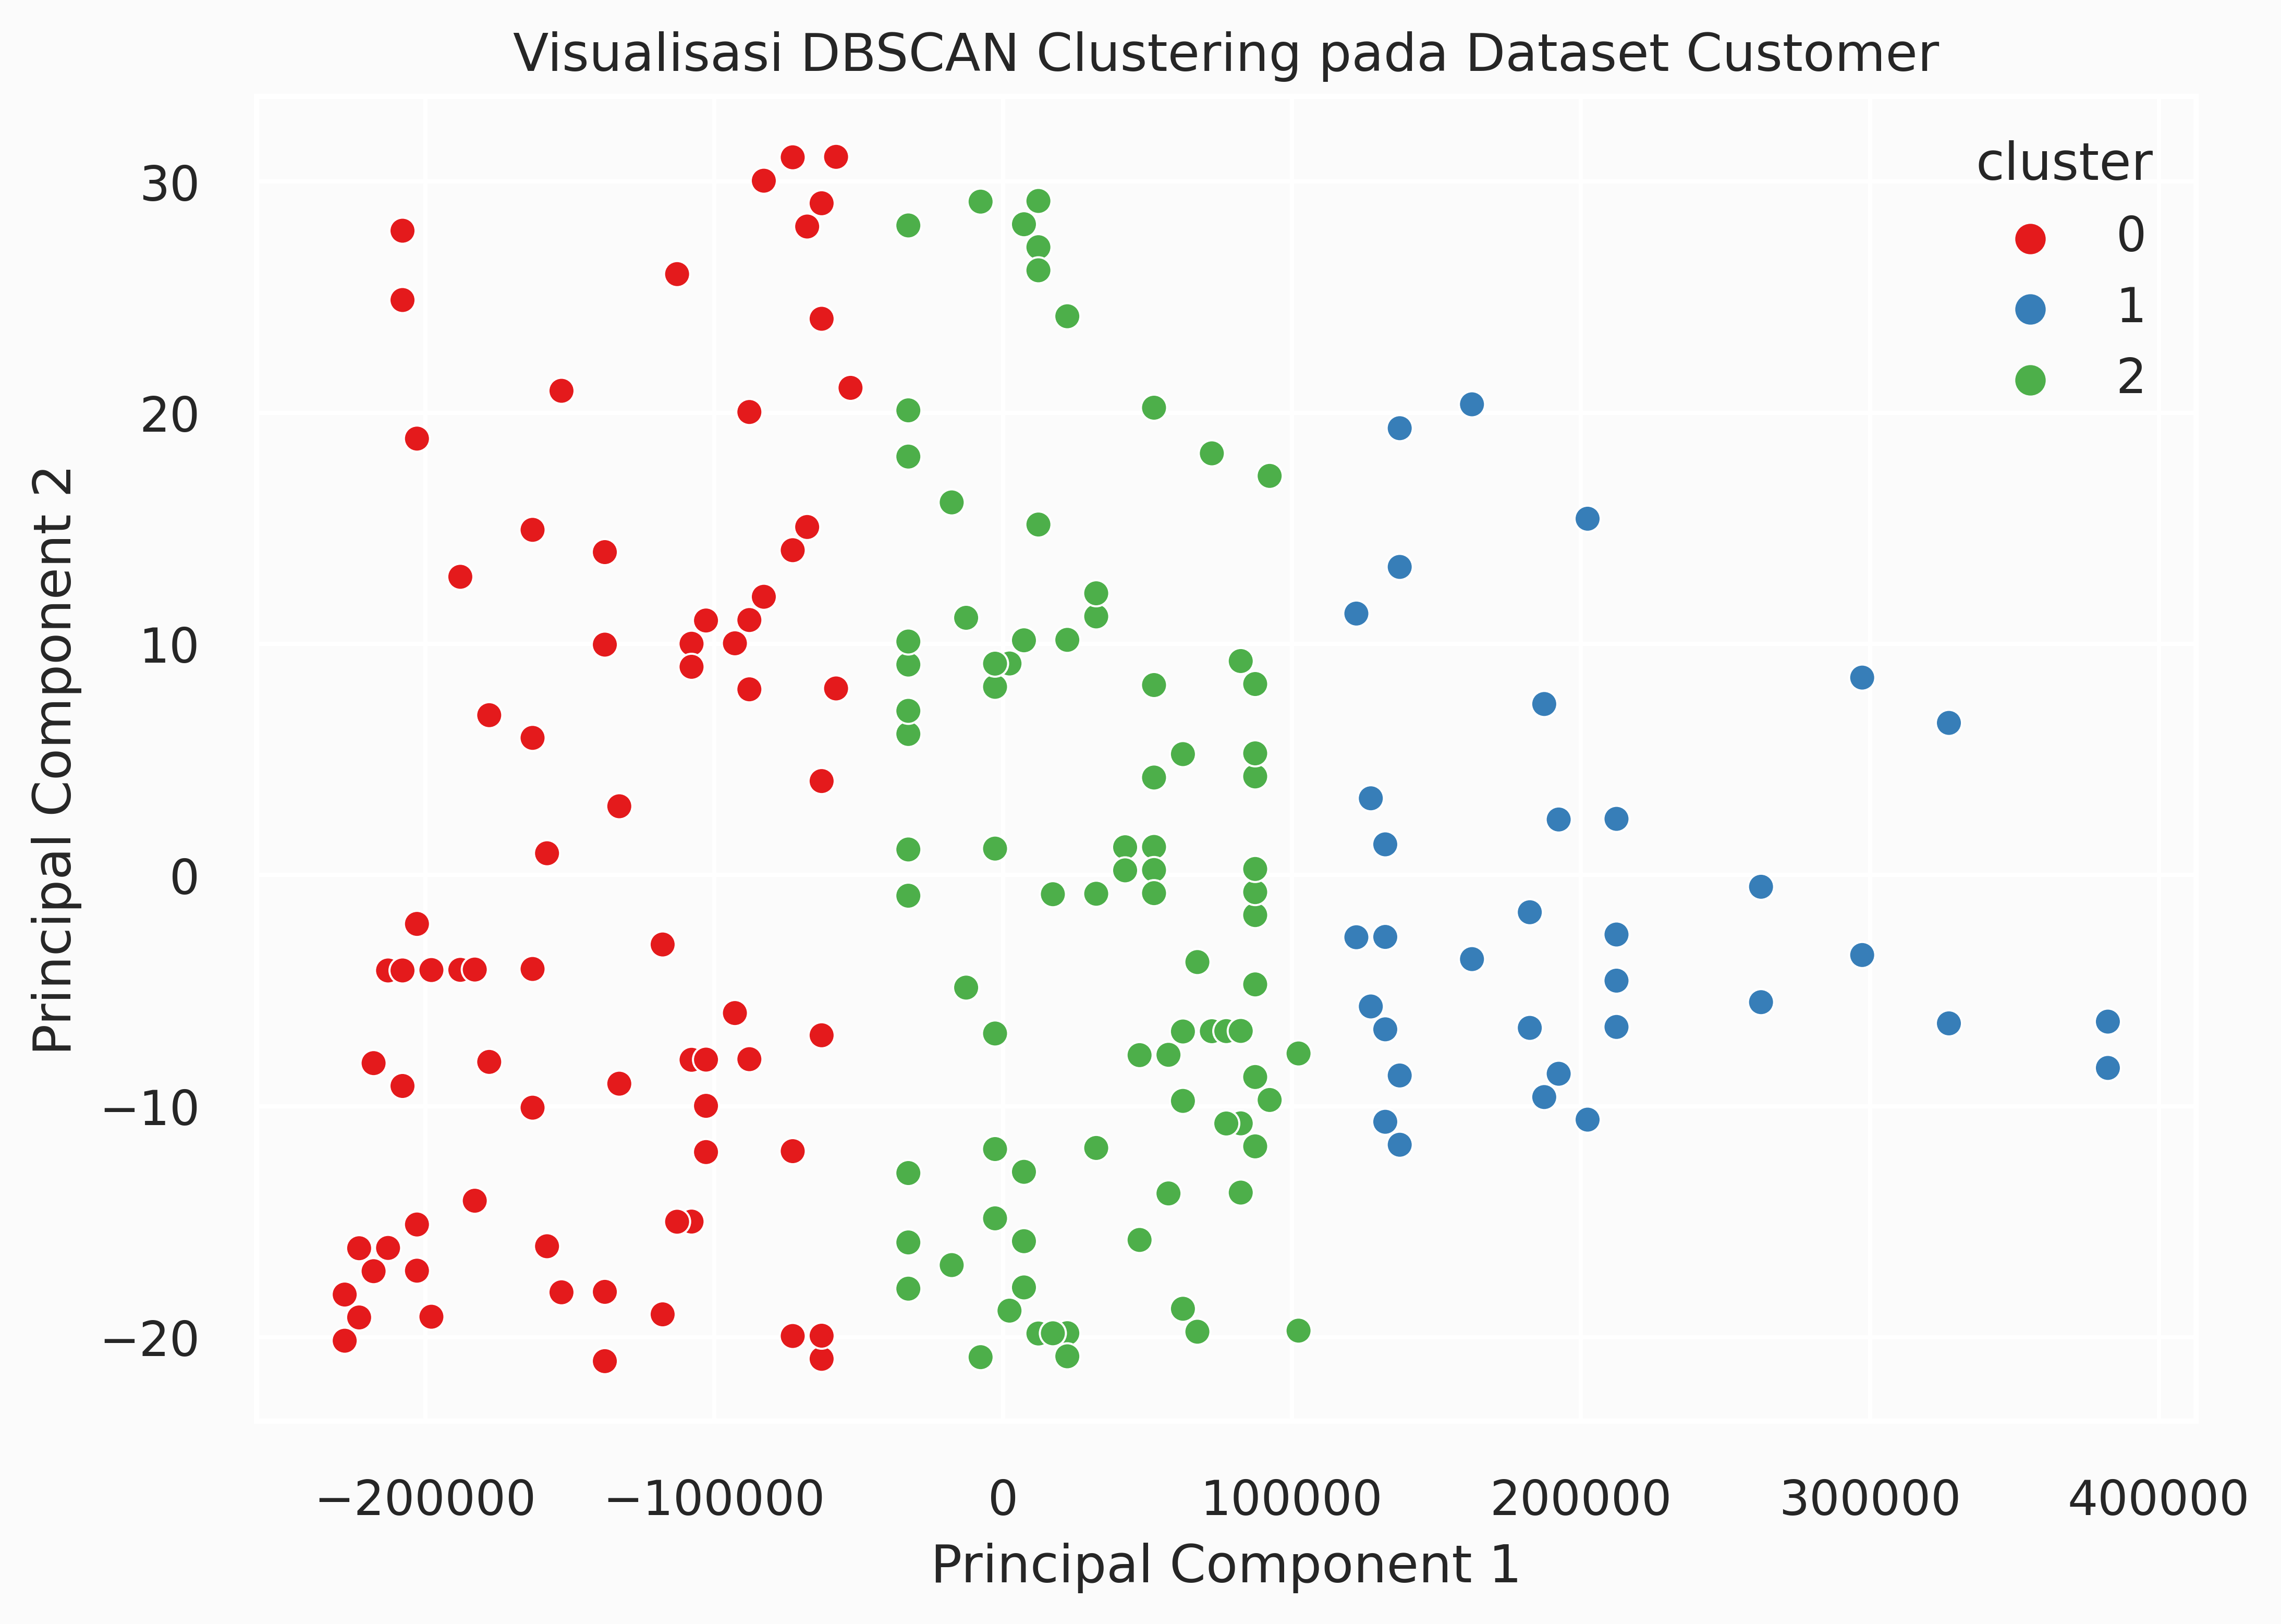

In [ ]:
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df, palette='Set1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualisasi DBSCAN Clustering pada Dataset Customer')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Assuming scaleddata is your scaled dataset
d_cluster = DBSCAN(eps=1.125, min_samples=5)
scaleddata['cluster'] = d_cluster.fit_predict(scaleddata)

# Check the number of unique labels
unique_labels = len(set(d_cluster.labels_))

if unique_labels > 1:
    slht_scr_dbs = silhouette_score(scaleddata, d_cluster.labels_)
    print("Silhouette Score:", slht_scr_dbs)
else:
    print("Only one cluster is formed. Adjust DBSCAN parameters to form multiple clusters.")


Silhouette Score: 0.5512063246025819


#KOMPARASI

In [ ]:
print("The Silhouette score of KMeans Clustering:",slht_scr_km)
print("The Silhouette score of Hierarchical Clustering:",slht_scr_hrc)
print("The Silhouette score of DB Scan Clustering:",slht_scr_dbs)

The Silhouette score of KMeans Clustering: 0.5630723128969357
The Silhouette score of Hierarchical Clustering: 0.5025440766591031
The Silhouette score of DB Scan Clustering: 0.5512063246025819
